In [1]:
import scipy
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
import sir_model

In [15]:
# initialize recording of parameter choices and true/false


beta_search_bounds = [1000*0.000001,1000*0.002]
gamma_search_bounds = [0.082,0.085]

### Start here at each iteration by changing the number of values of beta_val and gamma_val to synthesize , then run the following cells to observe the simulation and tell whether the parameter settings are what you're looking for (1) or not (0).

In [16]:
beta_values_to_synthesize = 100
gamma_values_to_synthesize = 100

In [17]:
search_points_beta = np.linspace(beta_search_bounds[0], beta_search_bounds[1], beta_values_to_synthesize)
search_points_gamma = np.linspace(gamma_search_bounds[0], gamma_search_bounds[1], gamma_values_to_synthesize)

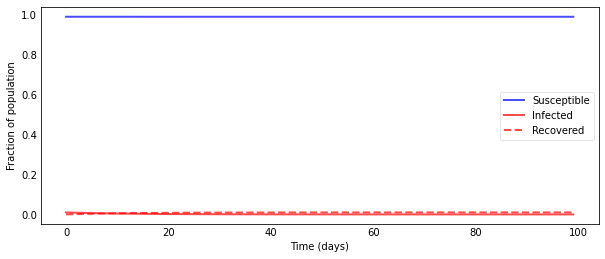

False


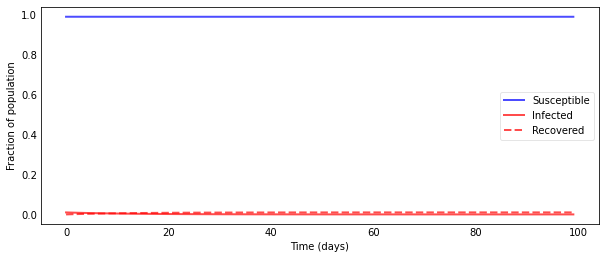

False


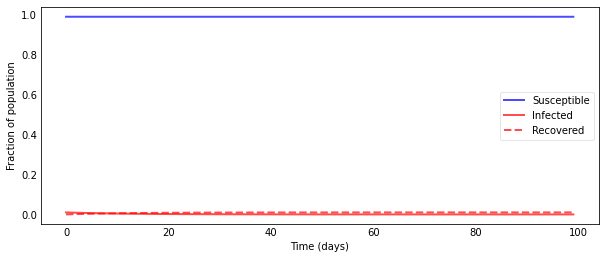

False


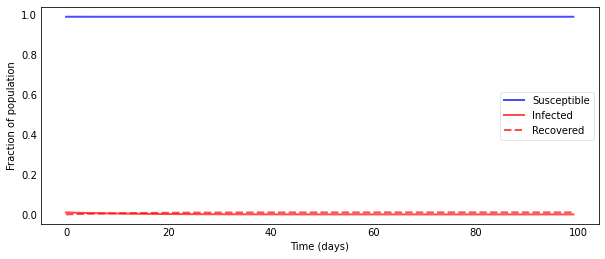

False


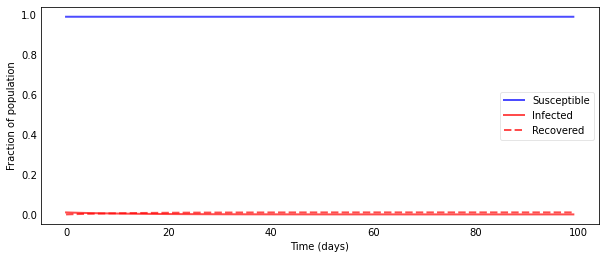

False


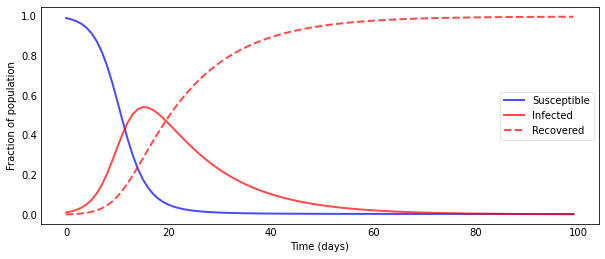

True


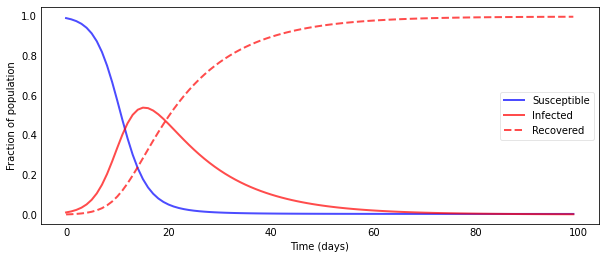

True


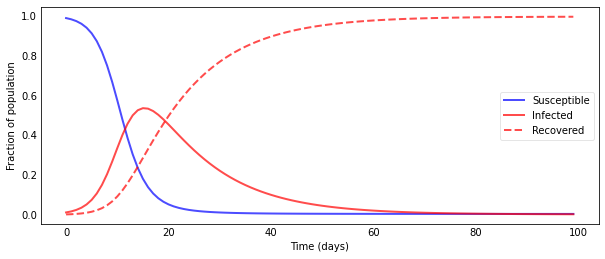

True


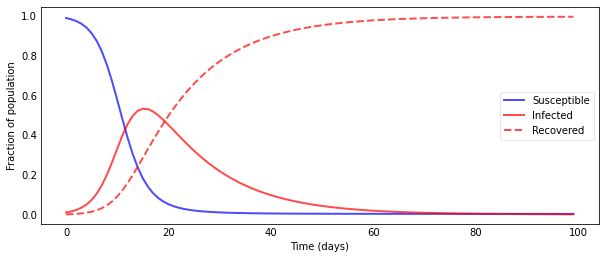

True


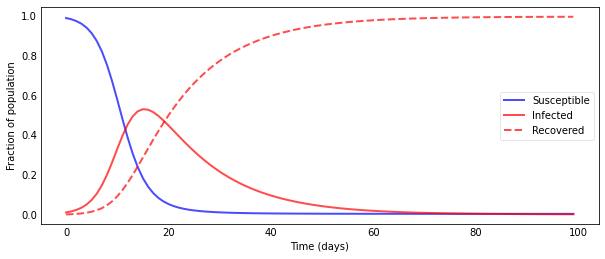

True


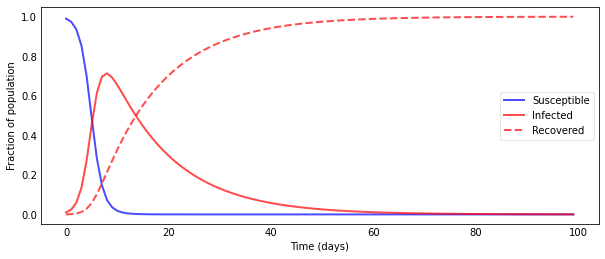

True


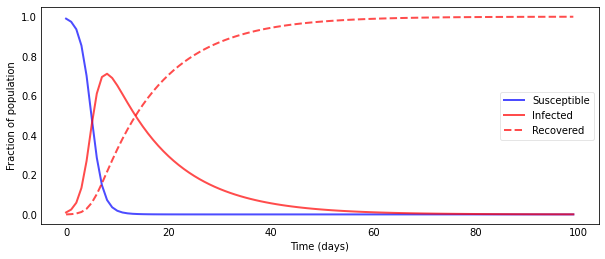

True


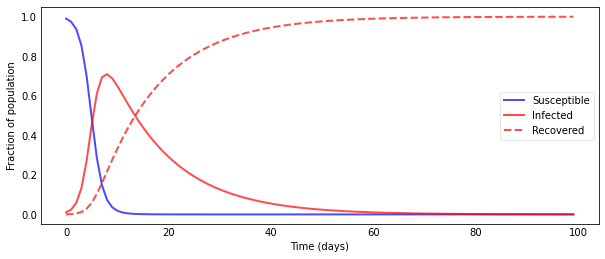

True


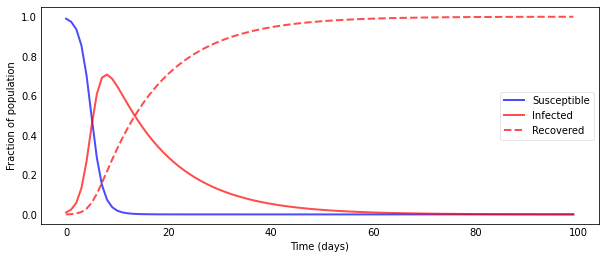

True


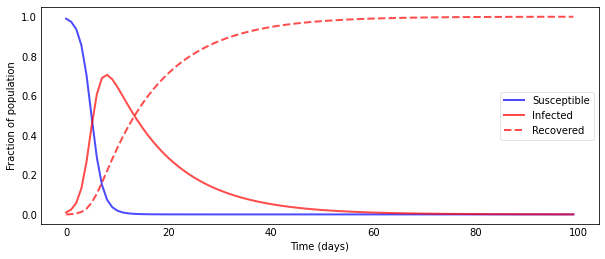

True


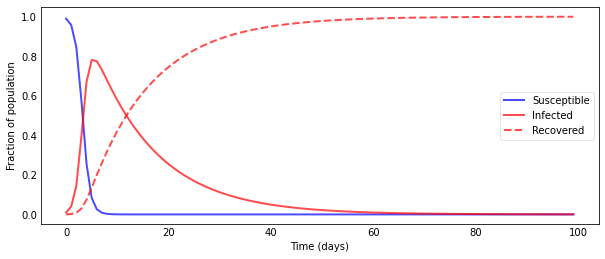

True


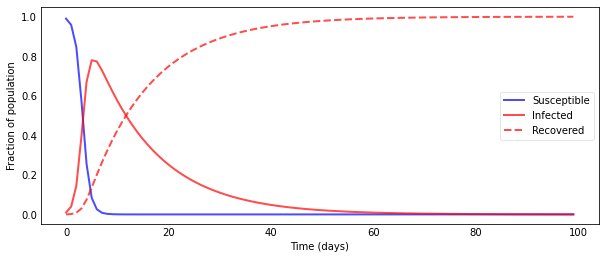

True


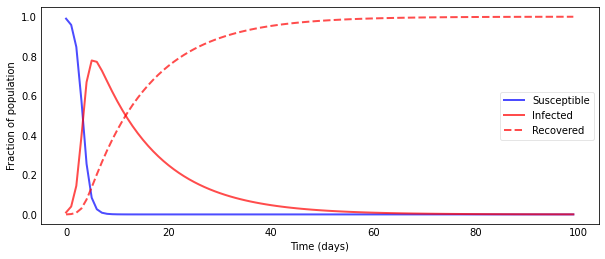

True


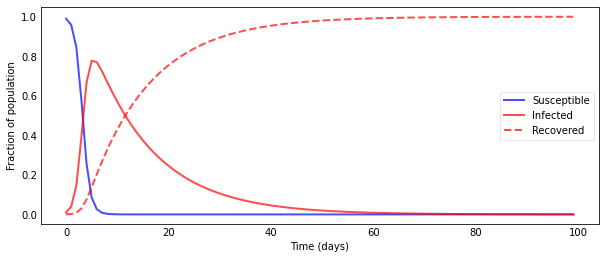

True


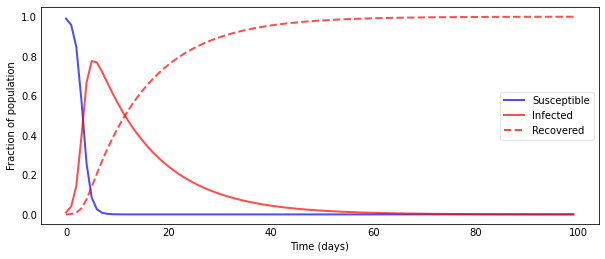

True


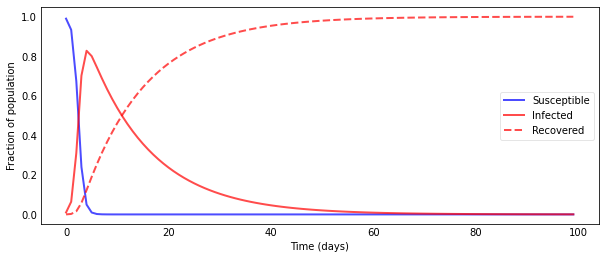

True


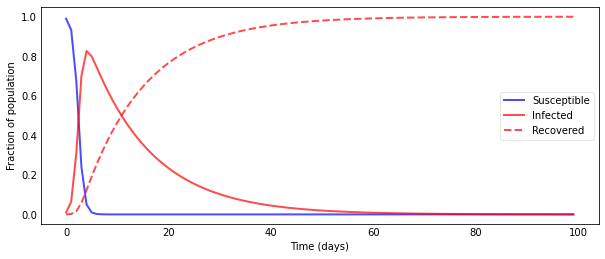

True


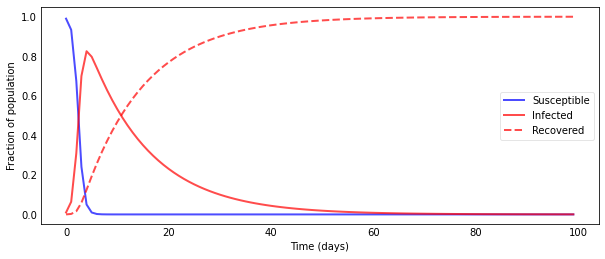

True


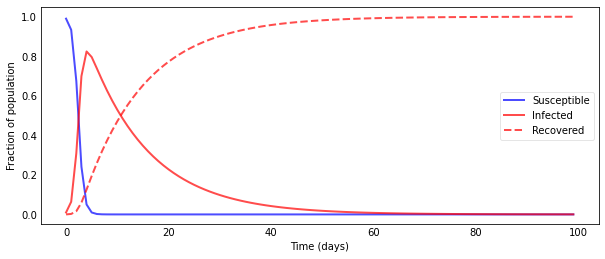

True


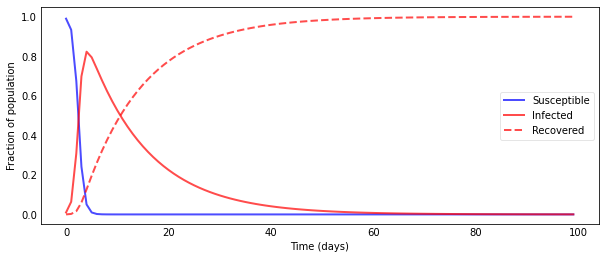

True


In [54]:
# set parameters


param_choices_true_false = []

def ps(param_synth_method):
    for i in range(len(search_points_beta)):
        beta_val = search_points_beta[i]
        for j in range(len(search_points_gamma)):
            gamma_val = search_points_gamma[j]

            # parameters

            def beta(t): return np.piecewise(t, [t>=0], [beta_val])
            def gamma(t): return np.piecewise(t, [t>=0], [gamma_val])


            # set initial conditions
            I0, R0 = 0.01, 0
            S0 = 1-I0-R0
            y0 = S0, I0, R0 # Initial conditions vector
            # set simulation parameters
            dt = 1
            tstart = 0
            tend = 100
            tvect = np.arange(tstart, tend, dt)
            # simulate/solve ODEs
            sim = odeint(sir_model.SIR_model, y0, tvect, args=(beta, gamma))
            S, I, R = sim.T

            # plot results
            #sir_model.plotSIR(tvect, S, I, R)
            ## log parameters and sat/unsat

            query_condition =  all(I[0:50] >= (0.9141058921813964/1000)) and all(I[0:50] <= (909.6296997070312/1000)) and all(I[50:] >= (0.0005660105962306/1000)) and all(I[50:] <= (154.95701599121094/1000))
           
            #print(query_condition)
            query = '1' if query_condition else '0'
            param_assignments = {'beta': beta_val, 'gamma': gamma_val, 'assignment': query} # for "all", go through every option. for "any", only need one good parameter choice.
            param_choices_true_false.append(param_assignments)
            if param_synth_method == "any" and query == '1':
                return param_choices_true_false
    return param_choices_true_false

param_choices_true_false = ps("all")


beta gamma


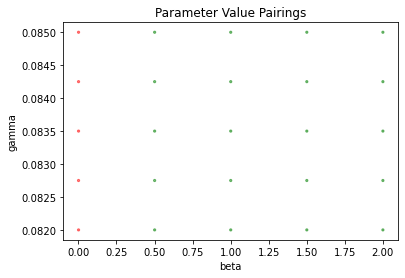

In [55]:
param_choices = list(param_choices_true_false[0].keys())
parameter_list = ([elt for elt in param_choices if elt != 'assignment'])
for i in range(len(parameter_list)):
    for j in range(i+1, len(parameter_list)):
        param1 = parameter_list[i]
        param2 = parameter_list[j]
        print(param1, param2)
        xsample = [result[param1] for result in param_choices_true_false]
        ysample = [result[param2] for result in param_choices_true_false]
        colors = ['green' if result['assignment'] == '1' else 'red' for result in param_choices_true_false]
        plt.title("Parameter Value Pairings")
        plt.xlabel(param1)
        plt.ylabel(param2)

        area = 5  # 0 to 15 point radii

        plt.scatter(xsample, ysample, s=area, c=colors, alpha=0.5)
        plt.show()